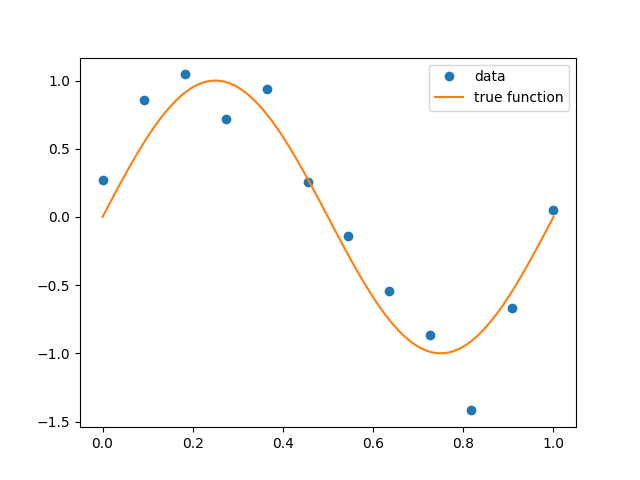

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial import Polynomial as poly
import scipy.optimize as opt
%matplotlib widget

import sys
import os
sys.path.append(os.path.abspath('..'))
from week_5.fit import fit

def truefunc(x, a=0):
    return np.sin(2*np.pi*x)

x = np.linspace(0, 1, 12)
y = truefunc(x)

#add noise
y_noise = y + np.random.normal(0, 0.2, 12)

plt.figure()
plt.plot(x, y_noise, 'o', label='data')
plt.plot(np.linspace(0, 1, 100), truefunc(np.linspace(0, 1, 100)), label='true function')
plt.legend()



Text(0.5, 1.0, 'fit')

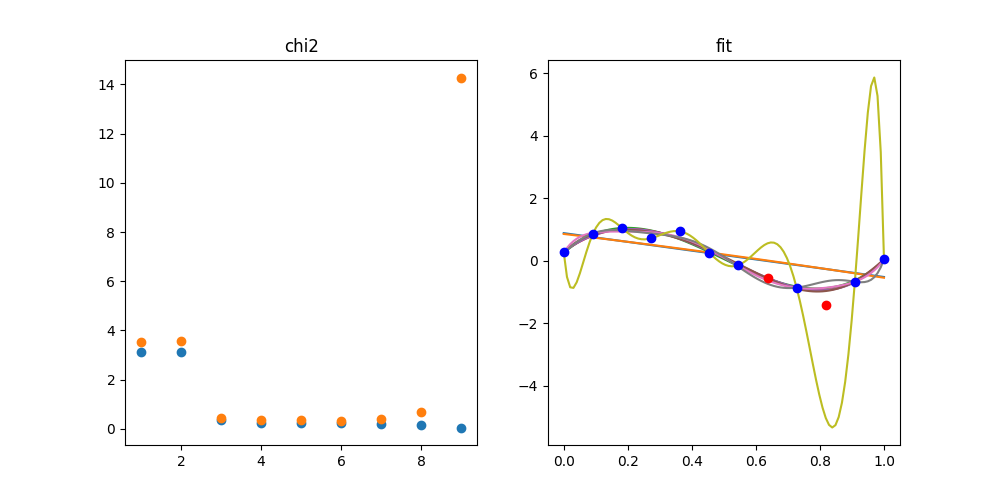

In [2]:
#calculate and test

def poly(x, a):
    return np.polyval(a, x)

def chi2(f, x, y, rho, a):
    return np.sum(((y - f(x, a))/rho)**2)

#use a few data points as check
ncheck = np.random.randint(0, len(x), 2)

#split data into training and test set
xtrain = np.delete(x, ncheck)
ytrain = np.delete(y_noise, ncheck)
xtest = x[ncheck]
ytest = y_noise[ncheck]

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
chi2list = []
chi2listtest = []
for i in range(0, 9):
    n = i + 1
    ap = np.polyfit(x, y_noise, n)
    chi2list.append(chi2(poly, x, y_noise, 1, ap))
    ap2 = np.polyfit(xtrain, ytrain, n)
    chi2listtest.append(chi2(poly, x, y_noise, 1, ap2))
    
    ax[1].plot(np.linspace(0, 1, 100), poly(np.linspace(0, 1, 100), ap2), label='polyfit')

ax[1].plot(xtrain, ytrain, 'o', label='train', color="blue")
ax[1].plot(xtest, ytest, 'o', label='test', color="red")

ax[0].plot(np.arange(1, 10), chi2list, 'o', label='all data')
ax[0].plot(np.arange(1, 10), chi2listtest, 'o', label='training data')
ax[0].set_title("chi2")
ax[1].set_title("fit")



Fit  original function: 0.657353047403293
step 21 chi2 3.1400264250833914
step 20 chi2 3.1400304416317892
step 20 chi2 3.140428037749709
step 21 chi2 3.1400264652488805
step 21 chi2 3.133439615740499
step 27 chi2 3.1334448088487656
step 20 chi2 3.133958752339344
step 21 chi2 3.1334396676715817
step 27 chi2 0.3572622756107993
step 27 chi2 0.3587215442211352
step 24 chi2 0.4956972599423112
step 27 chi2 0.3572768687306421
step 37 chi2 0.26260544863543583
step 31 chi2 0.2630846680441606
step 22 chi2 0.30845737229021863
step 33 chi2 0.2626102422474544
step 35 chi2 0.2526764973979995
step 29 chi2 0.2551506557700176
step 22 chi2 0.2860314994474895
step 29 chi2 0.25270985165624743
step 41 chi2 0.2261822308698882
step 29 chi2 0.25500544971708416
step 22 chi2 0.2864559539355969
step 45 chi2 0.23040291085209333
step 123 chi2 0.21610668113372702
step 25 chi2 0.2502175739095366
step 24 chi2 0.28636008763396437
step 37 chi2 0.22213483426240346
step 999 chi2 0.16235314306662738
step 31 chi2 0.2390818

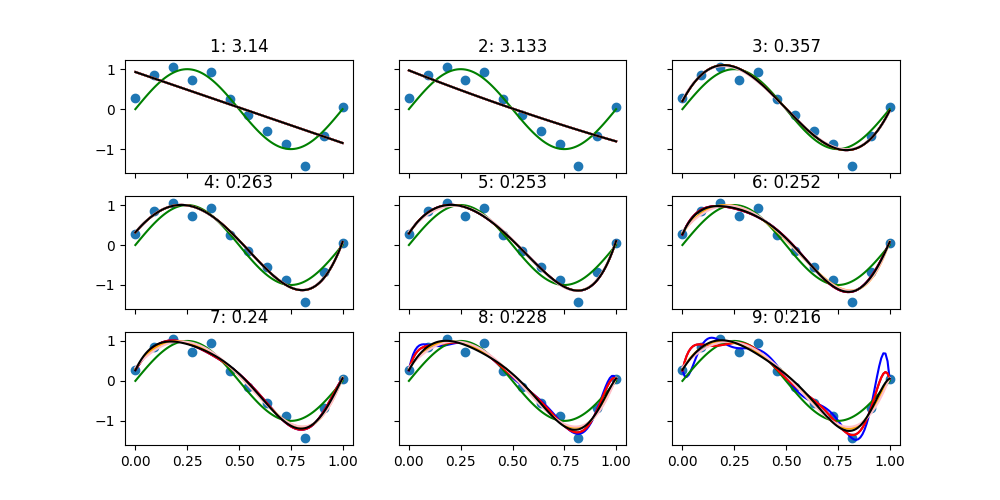

In [3]:
# fit function
def chi2(f, x, y, rho, a):
    return np.sum(((y - f(x, a))/rho)**2)

def chi2norm(f, x, y, rho, a, lam=1e-6):
    return np.sum(((y - f(x, a))/rho)**2) + lam*np.sum(a**2)



# polynomial functio of degre
# 
def poly(x, a):
    return np.polyval(a, x)


print("Fit  original function:", chi2norm(truefunc, x, y_noise, 1, 1))



# plot everything

fig, ax = plt.subplots(3, 3, figsize=(10, 5), sharex=True, sharey=True)
#fig.tight_layout()


for i in range(3):
    for j in range(3):
        n = i*3 + j + 1
        a = opt.least_squares(lambda a: poly(x, a) - y_noise, np.zeros(n+1)).x
        ap = np.polyfit(x, y_noise, n)
        af = fit(poly, x, y_noise, np.ones(n+1), 1, chi2)
        anorm = fit(poly, x, y_noise, np.ones(n+1),1 , chi2norm)
        anorm2 = fit(poly, x, y_noise, np.ones(n+1), 1, lambda poly, x, y, rho, a: chi2norm(poly, x, y, rho, a, lam=1e-4))
        anorm3 = fit(poly, x, y_noise, np.ones(n+1), 1, lambda poly, x, y, rho, a: chi2norm(poly, x, y, rho, a, lam=1e-8))
        ax[i, j].plot(x, y_noise, 'o', label='data')
        ax[i, j].plot(np.linspace(0, 1, 100), poly(np.linspace(0, 1, 100), ap), label='polyfit', color="blue")
        ax[i, j].plot(np.linspace(0, 1, 100), poly(np.linspace(0, 1, 100), af), label='fit', color="purple")
        ax[i, j].plot(np.linspace(0, 1, 100), truefunc(np.linspace(0, 1, 100)), label='true function', color="green")
        ax[i, j].plot(np.linspace(0, 1, 100), poly(np.linspace(0, 1, 100), af), label='myfit', color="red")
        ax[i, j].plot(np.linspace(0, 1, 100), poly(np.linspace(0, 1, 100), anorm), label='myfit norm', color="orange")
        ax[i, j].plot(np.linspace(0, 1, 100), poly(np.linspace(0, 1, 100), anorm2), label='myfit norm2', color="pink")
        ax[i, j].plot(np.linspace(0, 1, 100), poly(np.linspace(0, 1, 100), anorm3), label='myfit norm3', color="black")
        ax[i, j].set_title(f"{n}: {np.round(chi2(poly, x, y_noise, 1, anorm), 3)}")
